In [2]:
train_dir = "C:\\Users\\alok\\Downloads\\signLanguage\\Train"
test_dir = "C:\\Users\\alok\\Downloads\\signLanguage\\Test"

# Data Preprocessing
- Read the picture files
- Decode the JPEG content to RBG grids of pixels
- Convert these in to floating tensors
- Rescale the pixel values (between 0 and 255) to the [0,1] interval

In [1]:
# All through single function
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Generating batches of tensor image data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_datagenerator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode= 'categorical'
)

Found 38000 images belonging to 37 classes.


In [4]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [5]:
# 37 classes (A-Z[26], 0-9[10], _[1])
num_classes = 37

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))  # Use 'softmax' for multi-class classification




In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [8]:
from tensorflow.keras import optimizers

model.compile(
    loss='categorical_crossentropy',  # Use 'categorical_crossentropy' for multi-class classification
    optimizer=optimizers.Adam(learning_rate=1e-4),  # Adam optimizer is commonly used
    metrics=['accuracy']  # 'accuracy' is a suitable metric for classification tasks
)


In [11]:
history = model.fit_generator(
    train_datagenerator,
    steps_per_epoch = 100,
    epochs = 20,
)

C:\Users\alok\AppData\Local\Temp\ipykernel_10204\3681141684.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
100/100 [==============================] - 77s 734ms/step - loss: 2.7403 - accuracy: 0.2820
Epoch 2/20
100/100 [==============================] - 74s 742ms/step - loss: 0.5783 - accuracy: 0.8330
Epoch 3/20
100/100 [==============================] - 64s 639ms/step - loss: 0.3010 - accuracy: 0.9185
Epoch 4/20
100/100 [==============================] - 52s 516ms/step - loss: 0.1794 - accuracy: 0.9500
Epoch 5/20
100/100 [==============================] - 51s 507ms/step - loss: 0.1050 - accuracy: 0.9720
Epoch 6/20
100/100 [==============================] - 50s 498ms/step - loss: 0.0567 - accuracy: 0.9850
Epoch 7/20
100/100 [==============================] - 50s 504ms/step - loss: 0.0381 - accuracy: 0.9875
Epoch 8/20
100/100 [==============================] - 50s 497ms/step - loss: 0.0440 - accuracy: 0.9870
Epoch 9/20
100/100 [==============================] - 47s 465ms/step - loss: 0.0313 - accuracy: 0.9915
Epoch 10/20
100/100 [==============================] - 47s 473ms/step - l

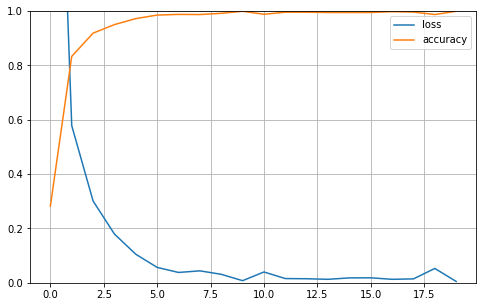

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [15]:
model.save("sign_1.h5")

In [16]:
from tensorflow.keras import backend as K

K.clear_session()
del model

# Test model

In [17]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np


In [18]:
# Load the trained model
model = load_model('sign_1.h5')  # Replace with the actual path to your trained model

In [36]:
# Path to the image you want to test
image_path = "C:\\Users\\alok\\Downloads\\signLanguage\\Test\\_J\\98.jpg" 

In [37]:
# Load and preprocess the image for prediction
img = image.load_img(image_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

In [38]:
# Make a prediction
predictions = model.predict(img_array)

1/1 [==============================] - 0s 31ms/step


In [39]:
# Decode the predictions to get class labels
# Assuming your classes are represented as integers (0 to 36)
predicted_class_index = np.argmax(predictions)

In [40]:
# Assuming you have a list of class labels corresponding to class indices
class_labels = ['0','1','2','3','4','5','6','7','8','9','A', 'B', 'C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','_']

In [41]:
predicted_class_label = class_labels[predicted_class_index]

print(f"Predicted Class Index: {predicted_class_index}")
print(f"Predicted Class Label: {predicted_class_label}")

Predicted Class Index: 19
Predicted Class Label: J
